In [1]:
import pandas as pd

# Load the dataset
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
                'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
                'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
                'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
                'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
                'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
                'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
                'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
                'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
                'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
                'spam']
dataset = pd.read_csv('spambase.data', header=None, names=column_names)

In [2]:
print(dataset.head())
print(dataset.info())


                                             word_freq_make  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00            0.00   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00            0.94   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64            0.25   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31            0.63   
                                       0.31            0.63   

                                             word_freq_address  word_freq_all  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00               0.00           0.64   
0.21 0.28 0.50 0.0 0.14 0.28 0.21 0.07 0.00               0.21           0.79   
0.06 0.00 0.71 0.0 1.23 0.19 0.19 0.12 0.64               0.38           0.45   
0.00 0.00 0.00 0.0 0.63 0.00 0.31 0.63 0.31               0.31           0.31   
                                       0.31               0.31           0.31   

                                             word_freq_3d  word_freq_our  \
0.00 0.64 0.64 0.0 0.32 0.00 0.00 0.00 0.00          0.00 

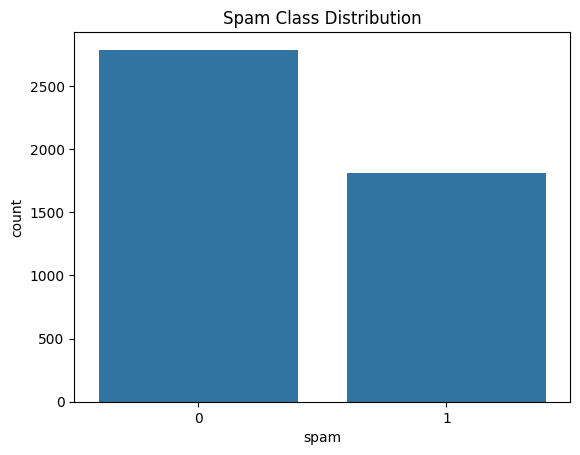

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='spam', data=dataset)
plt.title('Spam Class Distribution')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

X = dataset.drop('spam', axis=1)
y = dataset['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       531
           1       0.91      0.87      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921

Decision Tree Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       531
           1       0.90      0.86      0.88       390

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.96      0.91      0.93       390

    accuracy                           0.95       921
   macro avg       0.95      0.94  

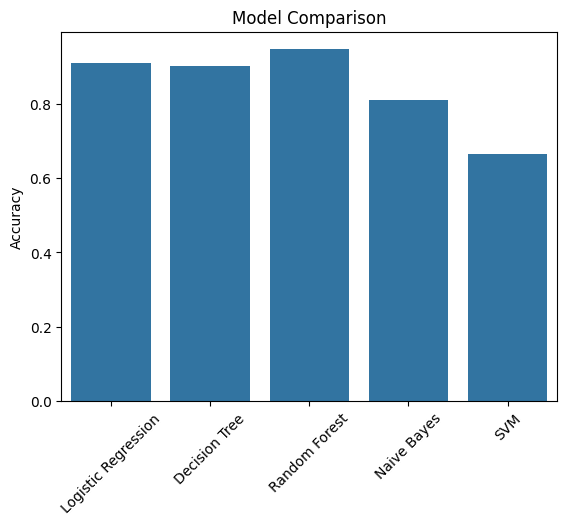

In [6]:
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Logistic Regression Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       531
           1       0.91      0.87      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.90      0.91       921
weighted avg       0.91      0.91      0.91       921

Decision Tree Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       531
           1       0.90      0.85      0.88       390

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921

Random Forest Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.97      0.91      0.94       390

    accuracy                           0.95       921
   macro avg       0.95      0.94  

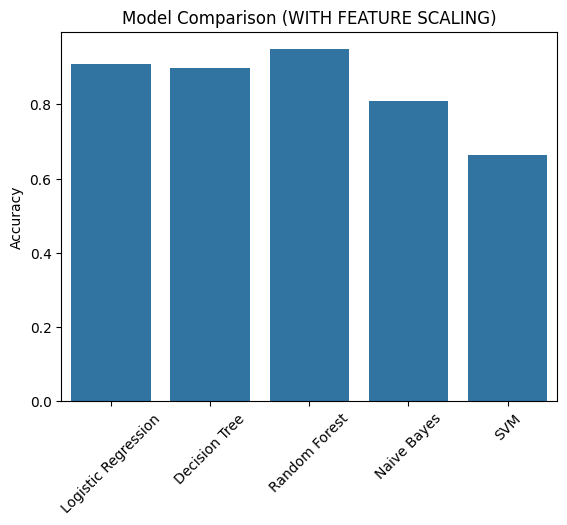

In [7]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison (WITH FEATURE SCALING)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


Logistic Regression Cross-Validation Accuracy: 0.91
Decision Tree Cross-Validation Accuracy: 0.90
Random Forest Cross-Validation Accuracy: 0.94
Naive Bayes Cross-Validation Accuracy: 0.80
SVM Cross-Validation Accuracy: 0.71


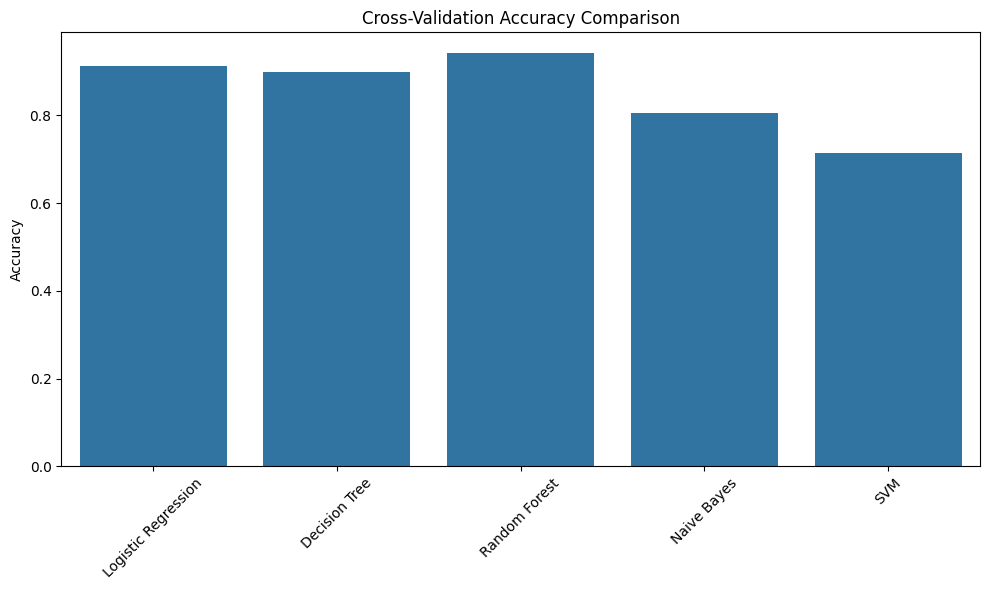

In [8]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_results.keys()), y=list(cv_results.values()))
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


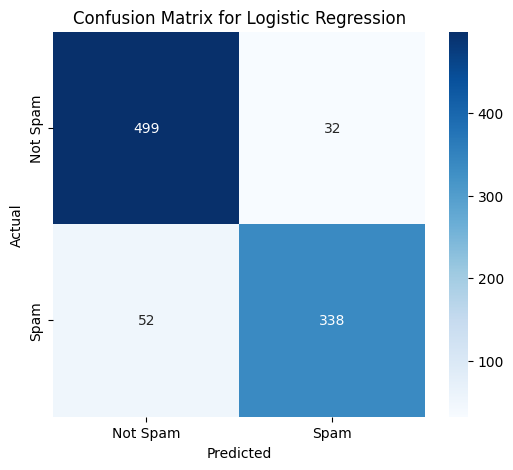

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression (as an example)
y_pred = models['Logistic Regression'].predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

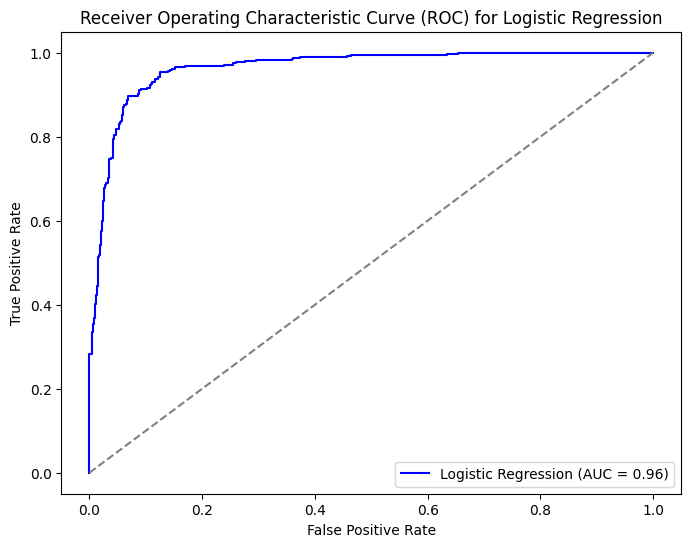

In [10]:
from sklearn.metrics import roc_curve, auc

# Example for Logistic Regression
y_prob = models['Logistic Regression'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (ROC) for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


Running GridSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy for Logistic Regression: 0.9097856237200598
Running GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy for Decision Tree: 0.9027165644487166
Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.9426648815641187
Running GridSearchCV for Naive Bayes...
Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Accuracy for Naive Bayes: 0.8046243374003358
Logistic Regression: Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}, Best Accuracy: 0.91
Decision Tree: Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}, B

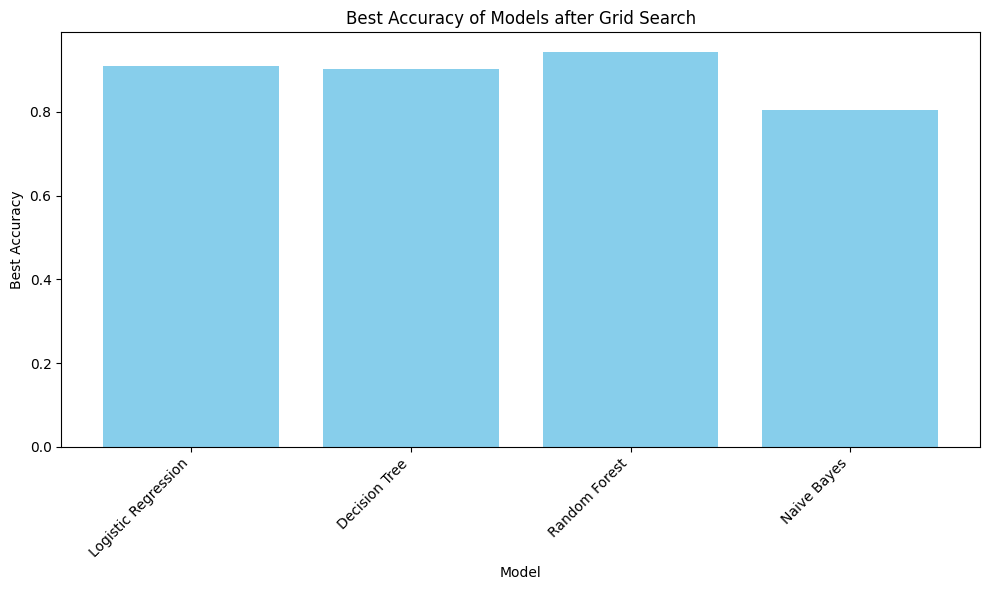

In [11]:
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning

# Suppress warnings related to convergence and fit failures
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Define parameter grids for all models
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],  # More moderate values
        'penalty': ['l2'],
        'solver': ['liblinear'],
        'max_iter': [1000, 2000]  # Ensure this is sufficient for convergence
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store the results
best_models = {}

# Perform grid search for all models
for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Store the best parameters and accuracy
    best_models[name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Accuracy': grid_search.best_score_
    }
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {name}: {grid_search.best_score_}")
    
# Optionally, print all results
for model_name, result in best_models.items():
    print(f"{model_name}: Best Parameters: {result['Best Parameters']}, Best Accuracy: {result['Best Accuracy']:.2f}")

# Extract model names and best accuracies
model_names = list(best_models.keys())
best_accuracies = [result['Best Accuracy'] for result in best_models.values()]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, best_accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Best Accuracy')
plt.title('Best Accuracy of Models after Grid Search')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define classifiers with hyperparameters
lr = LogisticRegression(max_iter=5000, C=1.0, solver='liblinear', penalty='l2')
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Add more classifiers to the ensemble
gnb = GaussianNB()  # Naive Bayes

# Hard Voting Classifier
voting_clf_hard = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('gnb', gnb)
], voting='hard')

# Soft Voting Classifier (using probabilities)
voting_clf_soft = VotingClassifier(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('gnb', gnb)
], voting='soft')

# Fit the models
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

# Make predictions
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

# Evaluate performance
print(f"Voting Classifier (Hard) Accuracy: {accuracy_score(y_test, y_pred_hard):.2f}")
print(f"Voting Classifier (Soft) Accuracy: {accuracy_score(y_test, y_pred_soft):.2f}")

# Hyperparameter Tuning (GridSearchCV) for the classifiers
param_grid_lr = {'C': [0.1, 1.0, 10.0], 'penalty': ['l2'], 'solver': ['liblinear']}
param_grid_dt = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}

# Grid Search for each model
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Use the best models for final voting classifier
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

# Create the final Voting Classifier with tuned models
voting_clf_best = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('dt', best_dt),
    ('rf', best_rf),
    ('gnb', gnb)
], voting='soft')

# Fit the final ensemble and make predictions
voting_clf_best.fit(X_train, y_train)
y_pred_best = voting_clf_best.predict(X_test)

# Evaluate performance of the best ensemble model
print(f"Final Voting Classifier Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


Voting Classifier (Hard) Accuracy: 0.94
Voting Classifier (Soft) Accuracy: 0.94
Best Parameters for Logistic Regression: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Final Voting Classifier Accuracy: 0.94


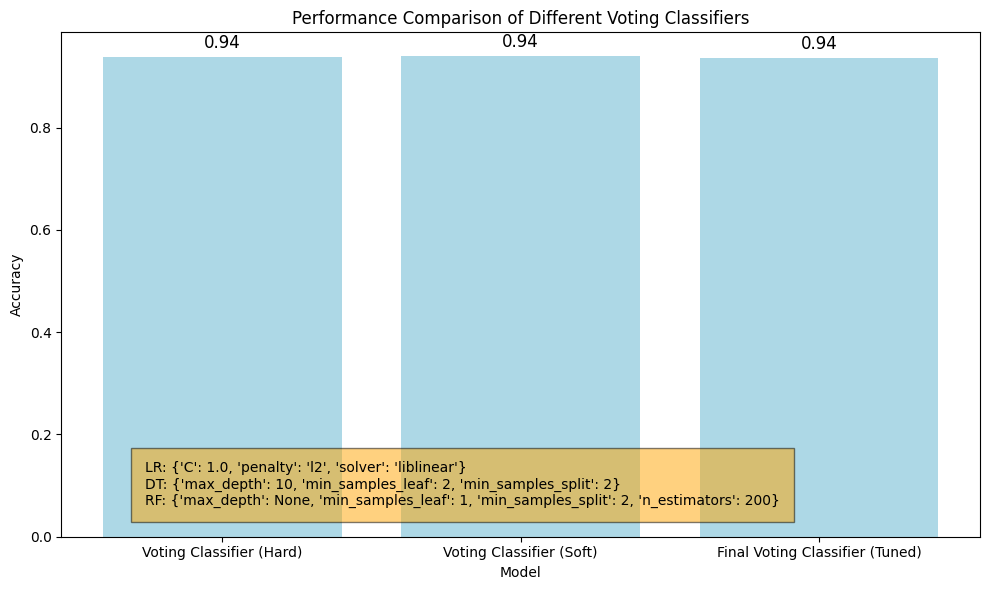

In [13]:

# Store the model names and their accuracies
model_names = ['Voting Classifier (Hard)', 'Voting Classifier (Soft)', 'Final Voting Classifier (Tuned)']
accuracies = [
    accuracy_score(y_test, y_pred_hard),
    accuracy_score(y_test, y_pred_soft),
    accuracy_score(y_test, y_pred_best)
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='lightblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of Different Voting Classifiers')

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f'{accuracy:.2f}',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Best parameters for each model used in the ensemble
best_params_text = (
    f"LR: {grid_lr.best_params_}\n"
    f"DT: {grid_dt.best_params_}\n"
    f"RF: {grid_rf.best_params_}"
)

# Display the best parameters in a text box at the bottom of the plot
plt.figtext(0.15, 0.15, best_params_text, fontsize=10, bbox={"facecolor": "orange", "alpha": 0.5, "pad": 10})

# Display the plot
plt.tight_layout()
plt.show()